Looking for ../demo_graphs/../demo_graphs/politicalbooks.gml.pkl
(datetime.timedelta(0, 0, 3074), ' elapsed time.')
Cliques found: 199
Loading ../demo_graphs/politicalbooks.gml
(datetime.timedelta(0, 0, 636394), ' elapsed time.')
7


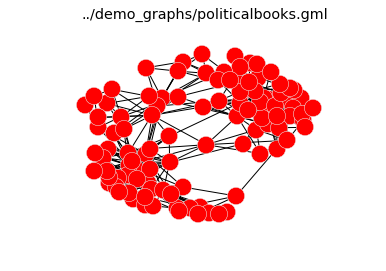

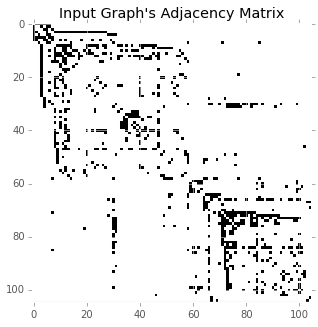

In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

from phoenix import phoenix, helpers, putils

from pprint import PrettyPrinter as pp

pp = pp(2).pprint
import networkx as nx
import datetime, timeit
import pickle
import numpy as np

# g = nx.karate_club_graph()
# nx.draw(g)
# nx.write_gml(g,"../demo_graphs/karate_club.gml")
# input_graph = "../demo_graphs/netscience.gml"
input_graph = "../demo_graphs/politicalbooks.gml"
# input_graph = "../demo_graphs/caveman_3x4.gml"
# input_graph = "../demo_graphs/karate_club.gml"

if not putils.cliques_exists_for(input_graph):
    g = putils.load_graph(input_graph)
    cliques = putils.getCliques(g, input_graph)
else:
    cliques  = putils.load_cliques_obj(input_graph)

cliques = list(cliques)

print 'Cliques found:', len(cliques)

## Plot data
g = putils.load_graph(input_graph)
A = nx.adjacency_matrix(g);
G = nx.from_scipy_sparse_matrix(A);
plt.title(input_graph)
print nx.diameter(g)

# Plot Graph
pos=nx.spring_layout(G) # positions for all nodes
nx.draw(G)

putils.draw_adjacency_matrix(G);
plt.title('Input Graph\'s Adjacency Matrix');





In [2]:
## Compression
pp('Starting compression ...')
one_to_two_model, two_to_one_intxn_model = phoenix.compress(cliques)
#print one_to_two_model, '\n', two_to_one_intxn_model
one_to_two_model

'Starting compression ...'


defaultdict(<class 'phoenix.SortedKeyCollections.SortedKeyCounter'>, {2: SortedKeyCounter({(4, 4): 21, (3, 3): 14, (5, 5): 10, (2, 2): 6, (6, 6): 2}), 3: SortedKeyCounter({(3, 4): 5, (4, 5): 4, (5, 6): 3, (2, 3): 1}), 4: SortedKeyCounter({(3, 3): 12, (4, 4): 10, (5, 5): 7, (3, 5): 1})})

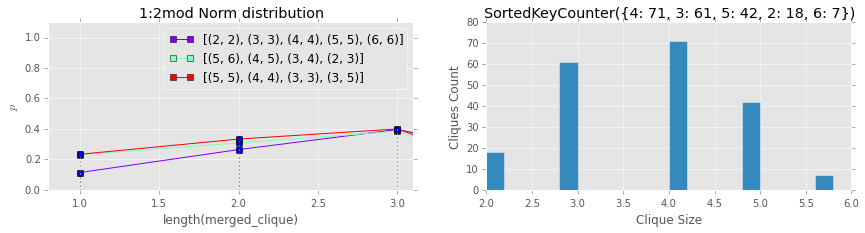

In [3]:
one_to_two_model       = helpers.normalize_distributions(one_to_two_model)
two_to_one_intxn_model = helpers.normalize_distributions(two_to_one_intxn_model)

## one_to_two_model
# one_to_two_model <- [size of the merged cliques][ size of the collapsing clique, size of the max_intxn_clq] 
# count each merged_clq size derived from pairs (collapsing_cliq, max_intxn_clq)  
# {2: SortedKeyCounter({(3, 3): 0.5454545454545454, (2, 2): 0.36363636363636365, (5, 5): 0.09090909090909091}),
#  3: SortedKeyCounter({(2, 3): 1.0}),
#  4: SortedKeyCounter({(3, 3): 0.8, (4, 4): 0.2})}
#one_to_two_model
import numpy as np
import matplotlib.cm as cm

colors = iter(cm.rainbow(np.linspace(0, 1, len(one_to_two_model))))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(1.6*9,1*3))

for key, value in one_to_two_model.iteritems() :
    #print key, one_to_two_model[key].values()
    y = one_to_two_model[key].values()
    x = one_to_two_model[key].keys()
    b = len(one_to_two_model[key])
    #ind = np.arange(one_to_two_model[key])
    #width=0.5
    ax1.plot(np.arange(1,b+1), y, '-s',color=next(colors), label=str(x))
    ax1.stem(np.arange(1,b+1), y, ':', alpha=0.4)

ax1.legend()
#plt.tight_layout()
# lm = ax1.get_axes()
ax1.set_title('1:2mod Norm distribution')
ax1.set_xlabel('length(merged_clique)')
ax1.set_ylabel('$p$')


ax1.set_xlim([.8, 3.1])
ax1.set_ylim([0,1.1])

clq_numb_dist = helpers.clique_number_distribution(cliques)

dat = [len(x) for x in cliques]
count,bins = np.histogram(dat)

rects1 = ax2.bar(bins[:-1],count,width = np.mean(np.diff(bins))/2.)
ax2.set_ylabel('Cliques Count')
ax2.set_xlabel('Clique Size')
ax2.set_title('%s'% clq_numb_dist)

In [4]:
clq_numb_dist    = helpers.normalize_distribution(clq_numb_dist) # the distribution of clique lengths
#pp(clq_numb_dist)




[(5, 5), (6, 6), (5, 6), (4, 4), (4, 5), (2, 3), (2, 2), (3, 5), (3, 4), (3, 3)] [[3, 4], [5], [4], [2, 3], [3], [1], [1], [2], [2], [1, 2]]


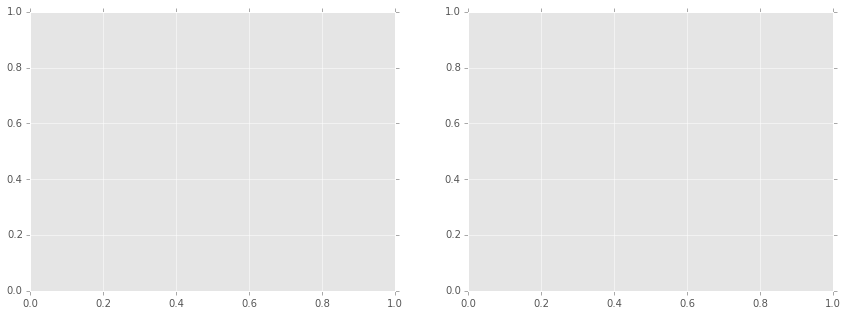

In [66]:
clqs_x_clqs_dist = helpers.cliques_x_cliques_distribution(cliques)
clqs_x_clqs_dist = helpers.normalize_distributions(clqs_x_clqs_dist)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(1.6*9,1*5))
colors = iter(cm.rainbow(np.linspace(0, 1, len(two_to_one_intxn_model.keys()))))
# for key, value in two_to_one_intxn_model.iteritems() :
#     y = two_to_one_intxn_model[key].values()
#     x = key
#b = len(two_to_one_intxn_model[key])
#     width = 0.5
# #     n, bins, patches = ax3.hist(y, 10 , normed=1)
#     ax3.bar(np.arange(1,b+1),y, width=width, color=next(colors),alpha=0.4)# label=str(x))
# #     ax3.stem(np.arange(1,b+1), y, ':', alpha=0.4)
two_to_one_intxn_model
x = two_to_one_intxn_model.keys()
y = two_to_one_intxn_model.values()
y = [kk.keys() for kk in y]

print x, y
# n, bins, patches = ax3.hist(y, len(x), normed=1, alpha=0.75)


# xTickMarks = ['Group'+str(i) for i in x]
# ax3.set_xticks(np.arange(6))

#pp(clqs_x_clqs_dist)
#
# print 'Compression Summary: \n  Number of cliques: %d' % len(cliques)
# print '  Compression rules: 1:2 model and 2:1 intersection model: %d, %d' % (len(one_to_two_model), len(two_to_one_intxn_model))
# print '  Clique sizes: ', (len(clq_numb_dist))
# print '  Cliques intersections: ', len(clqs_x_clqs_dist)


KeyboardInterrupt: 

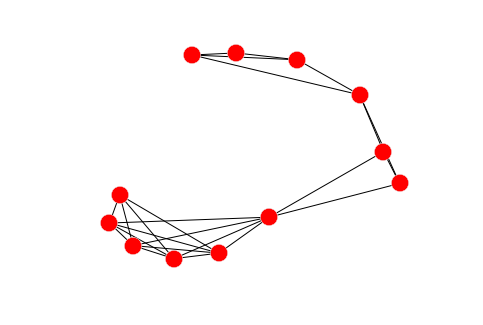

In [201]:
## Decompression
generated_graph = nx.Graph()
generated_graph.add_edge(0,1)
seeds = list(nx.find_cliques(generated_graph))
gen_graph, pwrgrid_hedges =phoenix.generate_hypergraph(generated_graph, \
                                                       one_to_two_model, \
                                                       two_to_one_intxn_model, \
                                                       clq_numb_dist, \
                                                       clqs_x_clqs_dist, 36) 
                                                       

In [ ]:
nx.draw(gen_graph)
nx.diameter(gen_graph)
